<a href="https://colab.research.google.com/github/mushrafi88/Julia-Set-Animation-using-Cuda-Acceleration/blob/master/julia_set_using_numba_gpu_acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


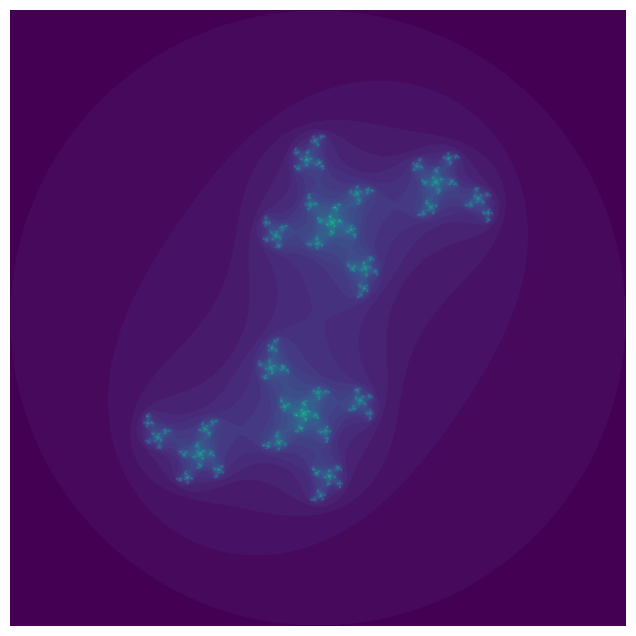

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda

@cuda.jit(device=True)
def julia_kernel(z, c, max_iterations):
    for i in range(max_iterations):
        if abs(z) > 2:
            return i
        z = z**2 + c
    return max_iterations

@cuda.jit
def compute_julia_set_kernel(julia_set, c, max_iterations, width, height, zoom):
    x, y = cuda.grid(2)
    if x < width and y < height:
        zx = -2 * zoom + 4 * zoom * x / (width - 1)
        zy = -2 * zoom + 4 * zoom * y / (height - 1)
        z = complex(zx, zy)
        julia_set[y, x] = julia_kernel(z, c, max_iterations)

def compute_julia_set(c, max_iterations=1000, width=800, height=800, zoom=1):
    julia_set = np.zeros((height, width), dtype=np.uint16)
    threadsperblock = (16, 16)
    blockspergrid_x = int(np.ceil(width / threadsperblock[0]))
    blockspergrid_y = int(np.ceil(height / threadsperblock[1]))
    blockspergrid = (blockspergrid_x, blockspergrid_y)
    compute_julia_set_kernel[blockspergrid, threadsperblock](julia_set, c, max_iterations, width, height, zoom)
    return julia_set

def plot_julia_set(c, filename, max_iterations=1000, width=800, height=800, zoom=1):
    julia_set = compute_julia_set(c, max_iterations, width, height, zoom)
    plt.figure(figsize=(width / 100, height / 100), dpi=100)
    plt.imshow(julia_set, cmap='viridis', extent=(-2 * zoom, 2 * zoom, -2 * zoom, 2 * zoom))
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

a = 1.2
c = 0.7885 * np.exp(1j * a)
filename = "julia_set_a_{}.png".format(a)

plot_julia_set(c, filename)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda
import os
import gc

@cuda.jit(device=True)
def julia_kernel(z, c, max_iterations):
    for i in range(max_iterations):
        if abs(z) > 2:
            return i
        z = z**2 + c
    return max_iterations

@cuda.jit
def compute_julia_set_kernel(julia_set, c, max_iterations, width, height, zoom):
    x, y = cuda.grid(2)
    if x < width and y < height:
        zx = -2 * zoom + 4 * zoom * x / (width - 1)
        zy = -2 * zoom + 4 * zoom * y / (height - 1)
        z = complex(zx, zy)
        julia_set[y, x] = julia_kernel(z, c, max_iterations)

def compute_julia_set(c, max_iterations=1000, width=800, height=800, zoom=1):
    julia_set = np.zeros((height, width), dtype=np.uint16)
    threadsperblock = (16, 16)
    blockspergrid_x = int(np.ceil(width / threadsperblock[0]))
    blockspergrid_y = int(np.ceil(height / threadsperblock[1]))
    blockspergrid = (blockspergrid_x, blockspergrid_y)
    compute_julia_set_kernel[blockspergrid, threadsperblock](julia_set, c, max_iterations, width, height, zoom)
    return julia_set

def save_julia_set_image(c, filename, max_iterations=1000, width=800, height=800, zoom=1):
    julia_set = compute_julia_set(c, max_iterations, width, height, zoom)
    plt.figure(figsize=(width / 100, height / 100), dpi=100)
    plt.imshow(julia_set, cmap='viridis', extent=(-2 * zoom, 2 * zoom, -2 * zoom, 2 * zoom))
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

def generate_julia_sequence(output_folder, num_images=2000,clear_memory_interval=100):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    a_values = np.linspace(0, 2 * np.pi, num_images)
    for i, a in enumerate(a_values):
        c = 0.7885 * np.exp(1j * a)
        filename = os.path.join(output_folder, f"julia_set_a_{i}.png")
        save_julia_set_image(c, filename)
        print(f"Saved image {i+1}/{num_images}: {filename}")
    if (i + 1) % clear_memory_interval == 0:
      gc.collect()
output_folder = "julia_output"
generate_julia_sequence(output_folder)


/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Saved image 1/2000: julia_output/julia_set_a_0.png
Saved image 2/2000: julia_output/julia_set_a_1.png
Saved image 3/2000: julia_output/julia_set_a_2.png
Saved image 4/2000: julia_output/julia_set_a_3.png
Saved image 5/2000: julia_output/julia_set_a_4.png
Saved image 6/2000: julia_output/julia_set_a_5.png
Saved image 7/2000: julia_output/julia_set_a_6.png
Saved image 8/2000: julia_output/julia_set_a_7.png
Saved image 9/2000: julia_output/julia_set_a_8.png
Saved image 10/2000: julia_output/julia_set_a_9.png
Saved image 11/2000: julia_output/julia_set_a_10.png
Saved image 12/2000: julia_output/julia_set_a_11.png
Saved image 13/2000: julia_output/julia_set_a_12.png
Saved image 14/2000: julia_output/julia_set_a_13.png
Saved image 15/2000: julia_output/julia_set_a_14.png
Saved image 16/2000: julia_output/julia_set_a_15.png
Saved image 17/2000: julia_output/julia_set_a_16.png
Saved image 18/2000: julia_output/julia_set_a_17.png
Saved image 19/2000: julia_output/julia_set_a_18.png
Saved image 

In [ ]:
!ffmpeg -framerate 60 -i julia_output/julia_set_a_%d.png -c:v libx264 -pix_fmt yuv420p -preset veryslow -crf 16 /content/julia_cuda.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e